In [1]:
%load_ext autoreload
%autoreload 2

from model import DiT
from cfm import CFM

import torch

/media/newhd/ayan/diffusion_exps/envs/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from PIL import Image

In [3]:
from trainer_accel import CifarConfig


In [4]:
def get_model(config, device, ckpt_path):
    dit = DiT(
            input_size=config.input_size,
            patch_size=config.patch_size,
            in_channels=config.in_channels,
            dim=config.dim,
            depth=config.depth,
            num_heads=config.num_heads,
            num_classes=config.num_classes,
            class_dropout_prob=config.class_dropout_prob,
            pos_encoding=config.positional_encoding,
            hidden_scale=config.hidden_scale,
        ) 

    model = CFM(model=dit, device=device)
    ckpt = torch.load(ckpt_path, weights_only=True, map_location='cpu')
    model.load_state_dict(ckpt['model'])
    return model

model = get_model(CifarConfig, torch.device('cuda'), '/media/newhd/ayan/diffusion_exps/DiT_cifar/cifar_models/checkpoints/model_440000.pt')
    

In [5]:
model.model.c_embedder.embed.weight.device

device(type='cuda', index=0)

In [18]:
image = model.sample(1, c=torch.Tensor([1]).long(), steps=50, cfg_scale=10)


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:02<00:00, 21.27it/s]


In [19]:
def img_from_tensor(image_tensor):
    image = image_tensor.permute(0, 2, 3, 1).detach().cpu().numpy()[0]
    image = (image * 255).astype('uint8')
    return Image.fromarray(image)


img = img_from_tensor(image)

In [20]:
from matplotlib.pyplot import imshow

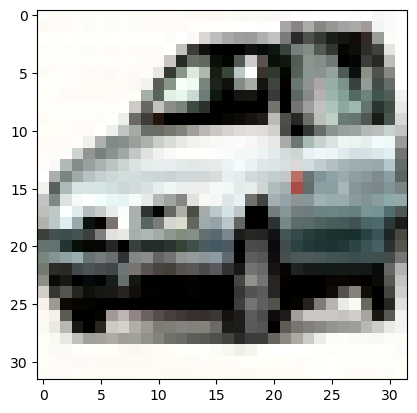

In [21]:
imshow(img)